In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [6]:
from skimage.feature import graycomatrix, graycoprops

In [3]:
def calculate_glcm(img_gray):
    glcm = graycomatrix(img_gray,  distances=[1], angles=[0], symmetric=True, normed=True)
    correlation = graycoprops(glcm, 'correlation')[0][0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    glcm_matrix = glcm[:,:,0,0]
    glcm_nonzero = glcm_matrix[glcm_matrix > 0]
    entropy = -np.sum(glcm_nonzero * np.log2(glcm_nonzero))
    
    glcm_mat = glcm[:,:,0,0]
    sum_avg = 0
    n = glcm_mat.shape[0]
    for i in range(2, 2*n + 1):
        p_x_y = 0
        for j in range(n):
            for k in range(n):
                if j + k + 2 == i:
                    p_x_y += glcm_mat[j, k]
        sum_avg += i*p_x_y
    sum_var = calculate_var(glcm_mat)
    
    return energy,correlation,entropy,sum_var,sum_avg

def calculate_var(glcm_matrix):
    size = glcm_matrix.shape[0]
    sum_entropy = 0
    for i in range(2, 2 * size + 1):
        p_x_y = 0
        for j in range(size):
            for k in range(size):
                if j + k + 2 == i:
                    p_x_y += glcm_matrix[j, k]
        if p_x_y > 0:
            sum_entropy -= p_x_y * np.log2(p_x_y)
    sum_var = 0
    for i in range(2, 2 * size + 1):
        p_x_y = 0
        for j in range(size):
            for k in range(size):
                if j + k + 2 == i:
                    p_x_y += glcm_matrix[j, k]
        if p_x_y > 0:
            sum_var += p_x_y * (i - sum_entropy)**2
    return sum_var
    
    

In [5]:
train_,test_ = [],[]

In [ ]:
import pywt

def calculate_wavelet_features(img_gray):
    coeffs2 = pywt.dwt2(img_gray, 'haar')
    cA, (cH, cV, cD) = coeffs2
    def stats(arr):
        arr = arr.astype(float)
        mean = np.mean(arr)
        std = np.std(arr)
        energy = np.sum(arr**2)
        arr2 = arr - arr.min() + 1e-12
        p = arr2 / np.sum(arr2)
        entropy = -np.sum(p * np.log2(p))
        return mean, std, energy, entropy
    
    fA = stats(cA)
    fH = stats(cH)
    fV = stats(cV)
    fD = stats(cD)
    return np.array([*fA, *fH, *fV, *fD])


In [ ]:
train_wa, test_wa = [], []

In [ ]:
#for wavlet
path = "./train/cats"
for f in os.listdir(path):
    img_path = os.path.join(path, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    wf = calculate_wavelet_features(img_gray)
    a = np.append(wf, 1)
    # print(wf)
    print(a)
    train_wa.append(a)
path1 = "./train/dogs"
for f in os.listdir(path1):
    img_path = os.path.join(path1, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    wf = calculate_wavelet_features(img_gray)
    a = np.append(wf, 0)
    print(a)
    train_wa.append(a)

In [6]:
#for glcm
path = "./train/cats"
for f in os.listdir(path):
    img_path = os.path.join(path, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f1,f2,f3,f4,f5 = calculate_glcm(img_gray)
    a = np.array([f1,f2,f3,f4,f5,1])
#     print(a)
    train_.append(a)    
path1 = "./train/dogs"
for f in os.listdir(path1):
    img_path = os.path.join(path1, f)
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f1,f2,f3,f4,f5 = calculate_glcm(img_gray)
    a = np.array([f1,f2,f3,f4,f5,0])
#     print(a)
    train_.append(a)  

[1.91460788e-02 9.83687248e-01 1.25842606e+01 8.06699200e+04
 2.67119019e+02 1.00000000e+00]
[2.28094836e-02 9.76191257e-01 1.24642853e+01 6.48002696e+04
 2.30094006e+02 1.00000000e+00]
[9.64047233e-03 9.02160633e-01 1.39651962e+01 5.66642464e+04
 2.14561626e+02 1.00000000e+00]
[4.60908119e-02 9.89630264e-01 1.07658140e+01 8.43537387e+04
 2.62140858e+02 1.00000000e+00]
[3.66836238e-02 9.82486444e-01 1.14894365e+01 5.23412672e+04
 2.04005705e+02 1.00000000e+00]
[1.83616616e-01 9.91676167e-01 9.01341806e+00 1.34821387e+05
 3.53835399e+02 1.00000000e+00]
[4.21430237e-02 9.95458864e-01 1.08170423e+01 1.29140574e+05
 3.47095818e+02 1.00000000e+00]
[3.67276745e-01 9.69341337e-01 9.08741594e+00 1.71047232e+05
 4.01228722e+02 1.00000000e+00]
[2.01571125e-02 9.85619070e-01 1.23806874e+01 8.02599260e+04
 2.58511526e+02 1.00000000e+00]


KeyboardInterrupt: 

In [15]:
df = pd.read_csv("my_data.csv")

In [16]:
df.head()

,F1,F2,F3,F4,F5,C
0,0.183617,0.991676,9.013418,134821.387154,353.835399,1.0
1,0.022809,0.976191,12.464285,64800.269571,230.094006,1.0
2,0.036684,0.982486,11.489437,52341.267166,204.005705,1.0
3,0.042143,0.995459,10.817042,129140.574357,347.095818,1.0
4,0.042280,0.985595,11.281864,90540.958010,287.414585,1.0


In [17]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5']]
y = df['C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Split complete: {X_train.shape[0]} train, {X_test.shape[0]} test samples")

Split complete: 55 train, 14 test samples


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    y_hat = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_hat)
    print(f"accuracy :{acc}, when k is {i}")

accuracy :0.5714285714285714, when k is 1
accuracy :0.6428571428571429, when k is 2
accuracy :0.5, when k is 3
accuracy :0.5714285714285714, when k is 4
accuracy :0.5714285714285714, when k is 5
accuracy :0.5714285714285714, when k is 6
accuracy :0.5, when k is 7
accuracy :0.6428571428571429, when k is 8
accuracy :0.7142857142857143, when k is 9
accuracy :0.6428571428571429, when k is 10


In [20]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)
y_hat = knn.predict(X_test_scaled)

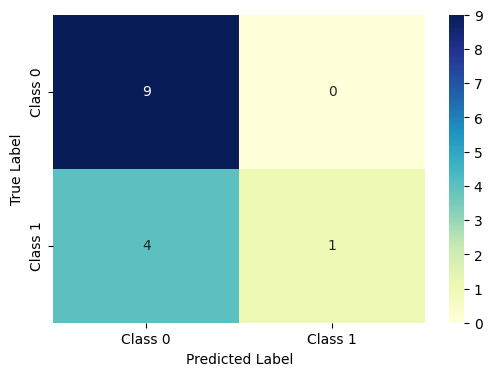

In [23]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='YlGnBu', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
df_test = pd.read_csv("test.csv")
df_test.shape

(24, 6)

In [31]:
test = scaler.transform(df_test.iloc[:,:5])

In [32]:
y_hat_test = knn.predict(test)

In [33]:
acc = accuracy_score(df_test.iloc[:,-1], y_hat_test)

In [34]:
acc

0.625

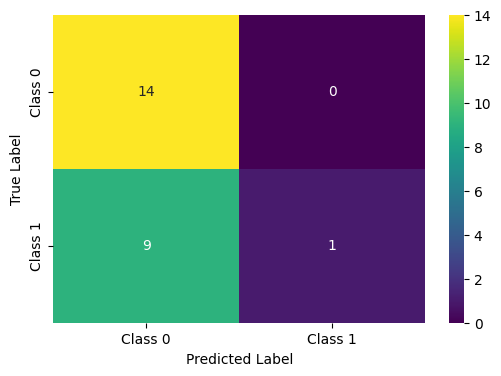

In [35]:
cm = confusion_matrix(df_test.iloc[:,-1], y_hat_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [47]:
df = pd.read_csv("wavelet_features.csv")
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,C
0,127.494736,79.760180,1.696532e+10,18.845697,-0.022082,7.397900,41054010.50,19.515619,-0.001197,7.772650,45318245.50,19.515173,-0.001090,4.605922,15913580.50,19.515878,1.0
1,243.012295,116.763023,9.281605e+08,13.437968,-0.094917,17.192409,3774362.50,13.633008,0.124599,13.083439,2185949.50,13.633278,-0.004934,7.862358,789337.50,13.635685,1.0
2,285.457980,112.362945,1.087931e+10,16.685623,-0.034563,9.352123,10110768.75,16.814134,-0.142383,8.540246,8433722.75,16.812805,-0.005272,4.654810,2504737.75,16.816033,1.0
3,282.739405,86.607339,8.595938e+09,16.508048,0.111038,28.696519,80953592.75,16.553346,0.375921,23.661812,55052468.75,16.561480,0.041804,14.993780,22100230.75,16.562751,1.0
4,202.029911,118.556129,7.363774e+09,16.760284,-0.071215,9.287376,11576150.00,17.030814,-0.016982,9.571432,12294410.00,17.029898,-0.003294,6.007749,4843689.00,17.031459,1.0


In [49]:
X = df.iloc[:, :16]
y = df['C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Split complete: {X_train.shape[0]} train, {X_test.shape[0]} test samples")

Split complete: 55 train, 14 test samples


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    y_hat = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_hat)
    print(f"accuracy :{acc}, when k is {i}")

accuracy :0.35714285714285715, when k is 1
accuracy :0.42857142857142855, when k is 2
accuracy :0.42857142857142855, when k is 3
accuracy :0.5, when k is 4
accuracy :0.42857142857142855, when k is 5
accuracy :0.7142857142857143, when k is 6
accuracy :0.6428571428571429, when k is 7
accuracy :0.7142857142857143, when k is 8
accuracy :0.7857142857142857, when k is 9
accuracy :0.7142857142857143, when k is 10


In [52]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)
y_hat = knn.predict(X_test_scaled)

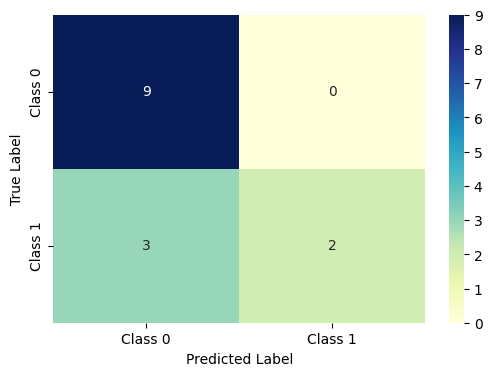

In [61]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='YlGnBu', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [54]:
df_test = pd.read_csv("wavlet_test.csv")
df_test.shape

(138, 17)

In [55]:
test = scaler.transform(df_test.iloc[:,:16])

In [56]:
y_hat_test = knn.predict(test)

In [57]:
acc = accuracy_score(df_test.iloc[:,-1], y_hat_test)

In [58]:
acc

0.5144927536231884